In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv("data-15Feb.csv")
dataset

,Period,Ax,Bx,Gap,Au,Lam,Force
0,950,115,295,70,70,0.636,4.120000e-11
1,950,115,295,70,70,0.638,6.980000e-11
2,950,115,295,70,70,0.640,1.240000e-10
3,950,115,295,70,70,0.642,-1.410000e-10
4,950,115,295,70,90,0.632,6.220000e-11
...,...,...,...,...,...,...,...
9995,950,195,335,420,150,0.634,2.940000e-10
9996,950,195,335,420,150,0.636,2.950000e-10
9997,950,195,335,420,150,0.638,2.960000e-10
9998,950,195,335,420,150,0.640,2.970000e-10


In [7]:
X = dataset.iloc[:, 0:6]
X

,Period,Ax,Bx,Gap,Au,Lam
0,950,115,295,70,70,0.636
1,950,115,295,70,70,0.638
2,950,115,295,70,70,0.640
3,950,115,295,70,70,0.642
4,950,115,295,70,90,0.632
...,...,...,...,...,...,...
9995,950,195,335,420,150,0.634
9996,950,195,335,420,150,0.636
9997,950,195,335,420,150,0.638
9998,950,195,335,420,150,0.640


In [8]:
Y = dataset.iloc[:, 6:7]
%store Y

Stored 'Y' (DataFrame)


In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)
# X = X.to_numpy()
# Y = Y.to_numpy()

In [32]:
X

array([[ 0.        , -1.76021608,  0.40289533, -1.17154695, -0.87964606,
        -0.29301764],
       [ 0.        , -1.76021608,  0.40289533, -1.17154695, -0.87964606,
         0.29254919],
       [ 0.        , -1.76021608,  0.40289533, -1.17154695, -0.87964606,
         0.87811602],
       ...,
       [ 0.        ,  1.34422145,  1.39769862,  1.54683964,  1.46326527,
         0.29254919],
       [ 0.        ,  1.34422145,  1.39769862,  1.54683964,  1.46326527,
         0.87811602],
       [ 0.        ,  1.34422145,  1.39769862,  1.54683964,  1.46326527,
         1.46368285]])

In [33]:
# Y = Y*10**5
Y

array([[0.14685433],
       [0.24632435],
       [0.43483048],
       ...,
       [1.03304183],
       [1.0365198 ],
       [1.03999777]])

In [35]:
# spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
Y = Y.reshape(-1)

%store Y >a.csv

Writing 'Y' (ndarray) to file 'a.csv'.


In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv=cv, verbose=20)
grid.fit(X, Y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)



Fitting 5 folds for each of 169 candidates, totalling 845 fits
[CV 1/5; 1/169] START C=0.01, gamma=1e-09.......................................
[CV 1/5; 1/169] END .......C=0.01, gamma=1e-09;, score=-0.000 total time=   2.5s
[CV 2/5; 1/169] START C=0.01, gamma=1e-09.......................................
[CV 2/5; 1/169] END .......C=0.01, gamma=1e-09;, score=-0.000 total time=   2.2s
[CV 3/5; 1/169] START C=0.01, gamma=1e-09.......................................
[CV 3/5; 1/169] END .......C=0.01, gamma=1e-09;, score=-0.000 total time=   1.8s
[CV 4/5; 1/169] START C=0.01, gamma=1e-09.......................................
[CV 4/5; 1/169] END .......C=0.01, gamma=1e-09;, score=-0.001 total time=   1.9s
[CV 5/5; 1/169] START C=0.01, gamma=1e-09.......................................
[CV 5/5; 1/169] END .......C=0.01, gamma=1e-09;, score=-0.000 total time=   1.9s
[CV 1/5; 2/169] START C=0.01, gamma=1e-08.......................................
[CV 1/5; 2/169] END .......C=0.01, gamma=1e-08

KeyboardInterrupt: 

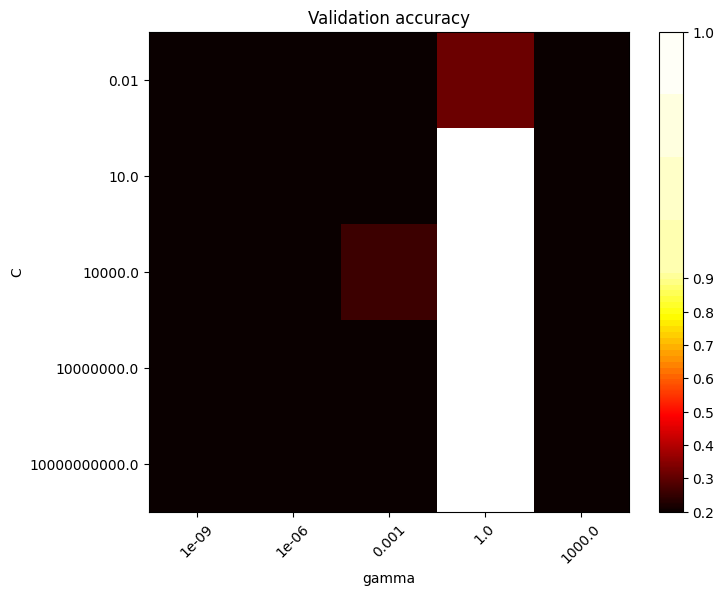

In [ ]:
import numpy as np
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()